# **Optimizing Fuel Efficiency: A Predictive Analysis of Auto MPG Data**

Our project revolves around leveraging the Auto MPG dataset to build a recommendation
system that suggests specific vehicle features for enhancing fuel efficiency. By analyzing the
relationships between various car attributes and MPG, we aim to provide users with tailored
recommendations on which particular feature adjustments could potentially improve a vehicle's
mileage, promoting informed decision-making and eco-friendly driving practices.

# **Goals**



*   Perform EDA on dataset to identify patterns and Relations
*   Build a Predictive model that predicts the given car MPG(mileage)
*   Using findings create a recomonder system that will give better spec values for improved mileage



In [1]:
#Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
from collections import defaultdict

In [2]:
#Read the dataset into Datatframe
MPG_Data=pd.read_excel('Auto_MPG.xlsx')
MPG_Data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car_Name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


The Orginal dataset contians the oserved MPG and car specs for specfic car models as seen above

# **/////////EDA////////**
# Data PreProcessing
//Cleaning the data

In [3]:
MPG_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car_Name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


**MPG** (Miles Per Gallon): Continuous **numerical** data representing fuel efficiency.

**Cylinders**: Discrete **numerical** data indicating the number of cylinders in the engine.

**Displacement**: Continuous **numerical** data representing the engine displacement.

**Horsepower**: It's marked as an **object**, which could mean it contains non-numeric values or mixed data types. Represent the horsepower of the car's engine.

**Weight**: Continuous **numerical** data indicating the weight of the car.

**Acceleration**: Continuous **numerical** data representing how quickly the car can increase its speed.

**Model Year**: Discrete **numerical** data indicating the year the car was manufactured.

**Origin**: Discrete **numerical** data indicating the origin or manufacturing location of the car.

**Car_Name**: **Categorical** data containing the names of the cars.


The horse power feature is shown as object data type this is an anomoly, there doesnt seem to be any null entries, thus convert horse power to numerical.

**There is no class Imbalance**

In [ ]:
# check unique values for attribute horsepower
MPG_Data['Horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

Horse power feature has special character " ? " thus its shown as object

In [4]:
# clean horsepower column
MPG_Data['Horsepower'] = pd.to_numeric(MPG_Data['Horsepower'].replace('?',''))
MPG_Data['Horsepower'].dtype
MPG_Data['Horsepower'].fillna(MPG_Data['Horsepower'].median(), inplace=True)

# //////// **DATA Visualization** ///////  

# //////// Outlier Detection ///////  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#function to draw box plot of the feature
def plot_boxplot(feature):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=MPG_Data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()


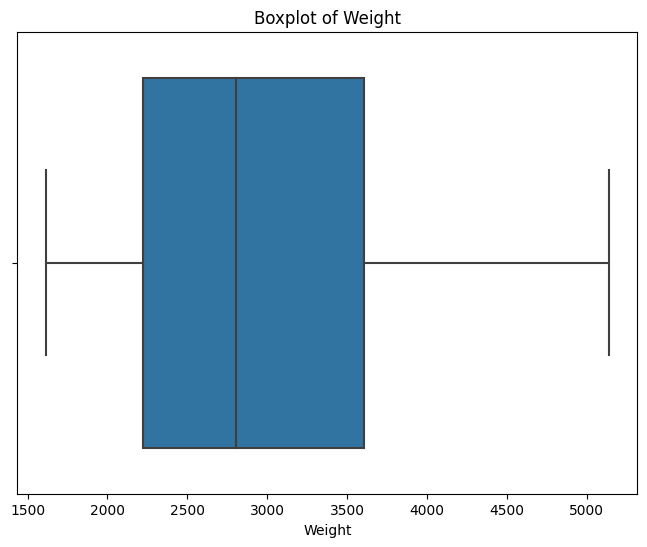

In [ ]:
#weight
plot_boxplot('Weight')

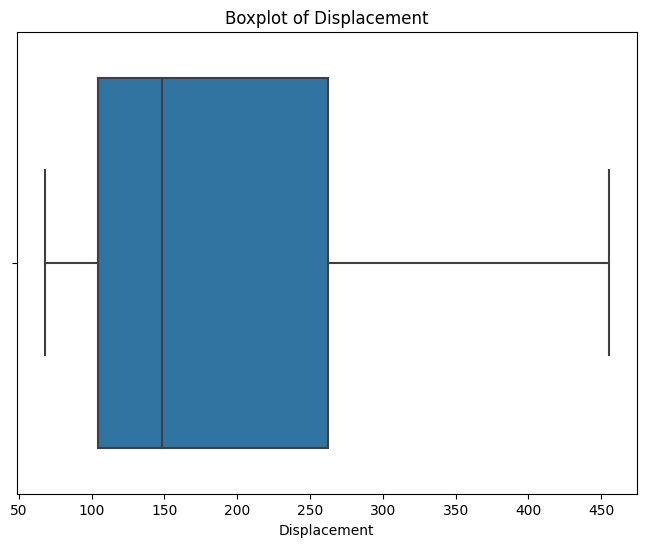

In [ ]:
plot_boxplot('Displacement')

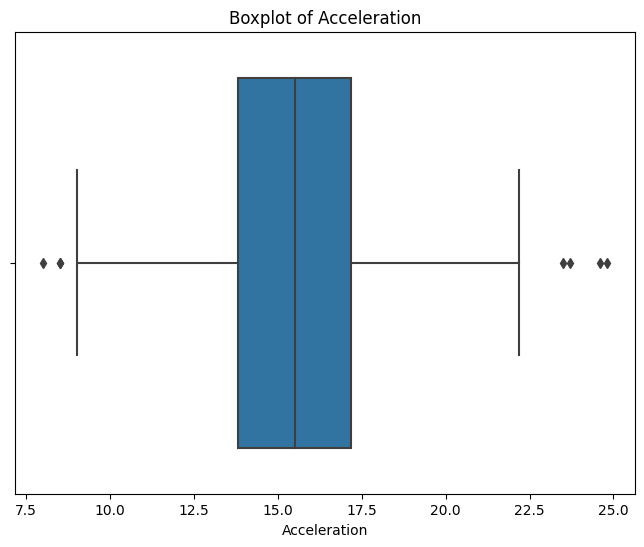

In [ ]:
plot_boxplot('Acceleration')

**Outliers** are present but  **random forest regressor** uses Descision trees as base model which are very robust to outliers since the outliers are not very high and the data will involve a recomender system outliers might be good for better model training

The model is **influenced by the features , heatmap **can give an insight into how each features is co related with each other and also which all features will be crucial for MPG

<ipython-input-13-82a84ade0fa4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = MPG_Data.corr()


                   MPG  Cylinders  Displacement  Horsepower    Weight  \
MPG           1.000000  -0.775396     -0.804203   -0.773453 -0.831741   
Cylinders    -0.775396   1.000000      0.950721    0.841284  0.896017   
Displacement -0.804203   0.950721      1.000000    0.895778  0.932824   
Horsepower   -0.773453   0.841284      0.895778    1.000000  0.862442   
Weight       -0.831741   0.896017      0.932824    0.862442  1.000000   
Acceleration  0.420289  -0.505419     -0.543684   -0.686590 -0.417457   
Model Year    0.579267  -0.348746     -0.370164   -0.413733 -0.306564   
Origin        0.563450  -0.562543     -0.609409   -0.452096 -0.581024   

              Acceleration  Model Year    Origin  
MPG               0.420289    0.579267  0.563450  
Cylinders        -0.505419   -0.348746 -0.562543  
Displacement     -0.543684   -0.370164 -0.609409  
Horsepower       -0.686590   -0.413733 -0.452096  
Weight           -0.417457   -0.306564 -0.581024  
Acceleration      1.000000    0.2881

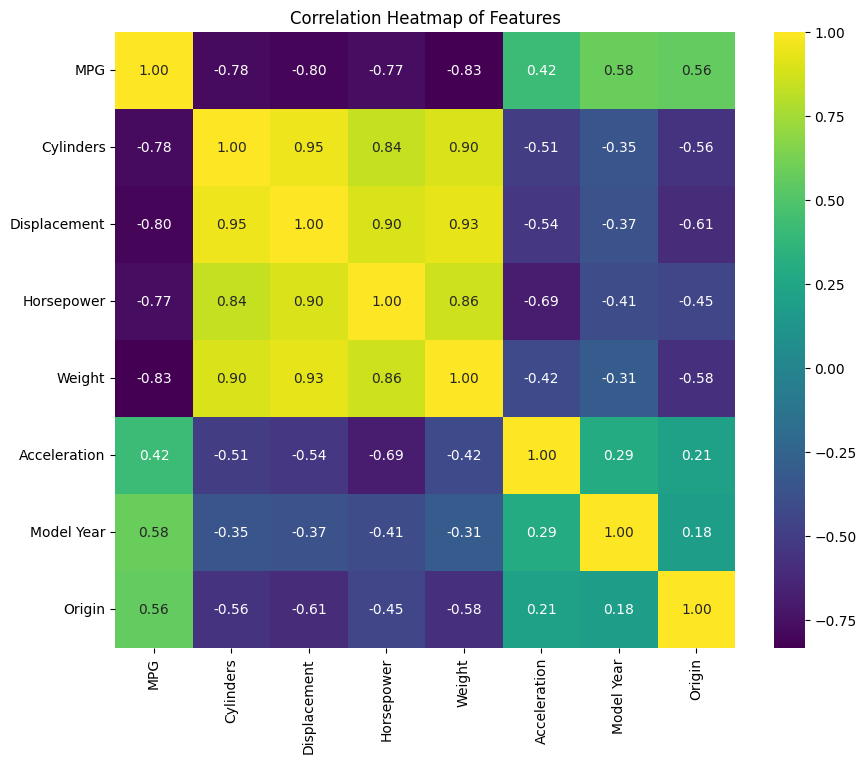

In [ ]:
# Calculate correlation matrix
corr_matrix = MPG_Data.corr()
print(corr_matrix)
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Heatmap of Features')
plt.show()


*   **MPG (Miles Per Gallon) shows a strong negative correlation** with Cylinders, Displacement, Horsepower, and Weight. This suggests that as MPG increases, these variables tend to decrease.
*  ** Cylinders, Displacement, Horsepower, and Weight show strong positive correlations** with each other, indicating that they tend to increase or decrease together.
*  **Acceleration has a moderate positive correlation with MPG and a moderate negative correlation with Cylinders, Displacement, Horsepower, and Weight**. This means that higher acceleration is somewhat associated with higher MPG and lower values in the other mentioned variables.
* **Model Year and Origin have moderate positive correlations with MPG**, suggesting a mild tendency for newer model years and specific origins to be associated with higher MPG


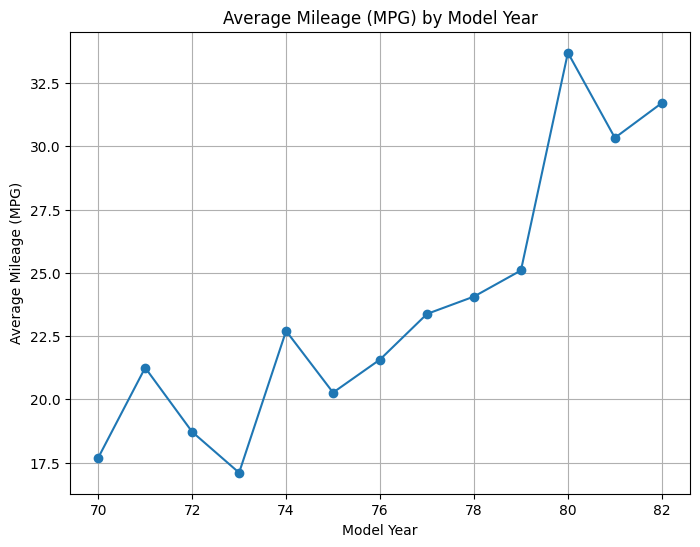

In [ ]:
# Calculate mean MPG for each model year
mpg_data_Visual=MPG_Data.copy()
avg_mpg_by_year = mpg_data_Visual.groupby('Model Year')['MPG'].mean()

# Line plot of average MPG over the years
plt.figure(figsize=(8, 6))
plt.plot(avg_mpg_by_year.index, avg_mpg_by_year.values, marker='o', linestyle='-')
plt.title('Average Mileage (MPG) by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Mileage (MPG)')
plt.grid(True)
plt.show()

The **average Mileage** has risen as years as shown in the graph from 70s to 80s

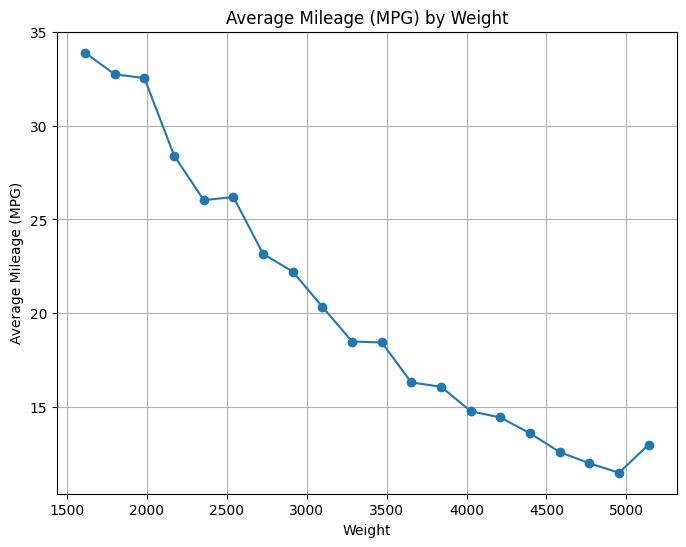

In [ ]:
# Define the number of bins or groups
num_bins = 20

# Create bins for weight data
weight_bins = np.linspace(mpg_data_Visual['Weight'].min(), mpg_data_Visual['Weight'].max(), num_bins)

# Assign each weight value to a bin
mpg_data_Visual['Weight Bin'] = np.digitize(mpg_data_Visual['Weight'], weight_bins)

# Calculate mean MPG for each weight bin
avg_mpg_by_weight_bin = mpg_data_Visual.groupby('Weight Bin')['MPG'].mean()

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(weight_bins, avg_mpg_by_weight_bin.values, marker='o')
plt.title('Average Mileage (MPG) by Weight')
plt.xlabel('Weight')
plt.ylabel('Average Mileage (MPG)')
plt.grid(True)
plt.show()

Cars with Lower weight have given more mileage , thus weight of the vehicles is an important factor

<Figure size 1200x1000 with 0 Axes>

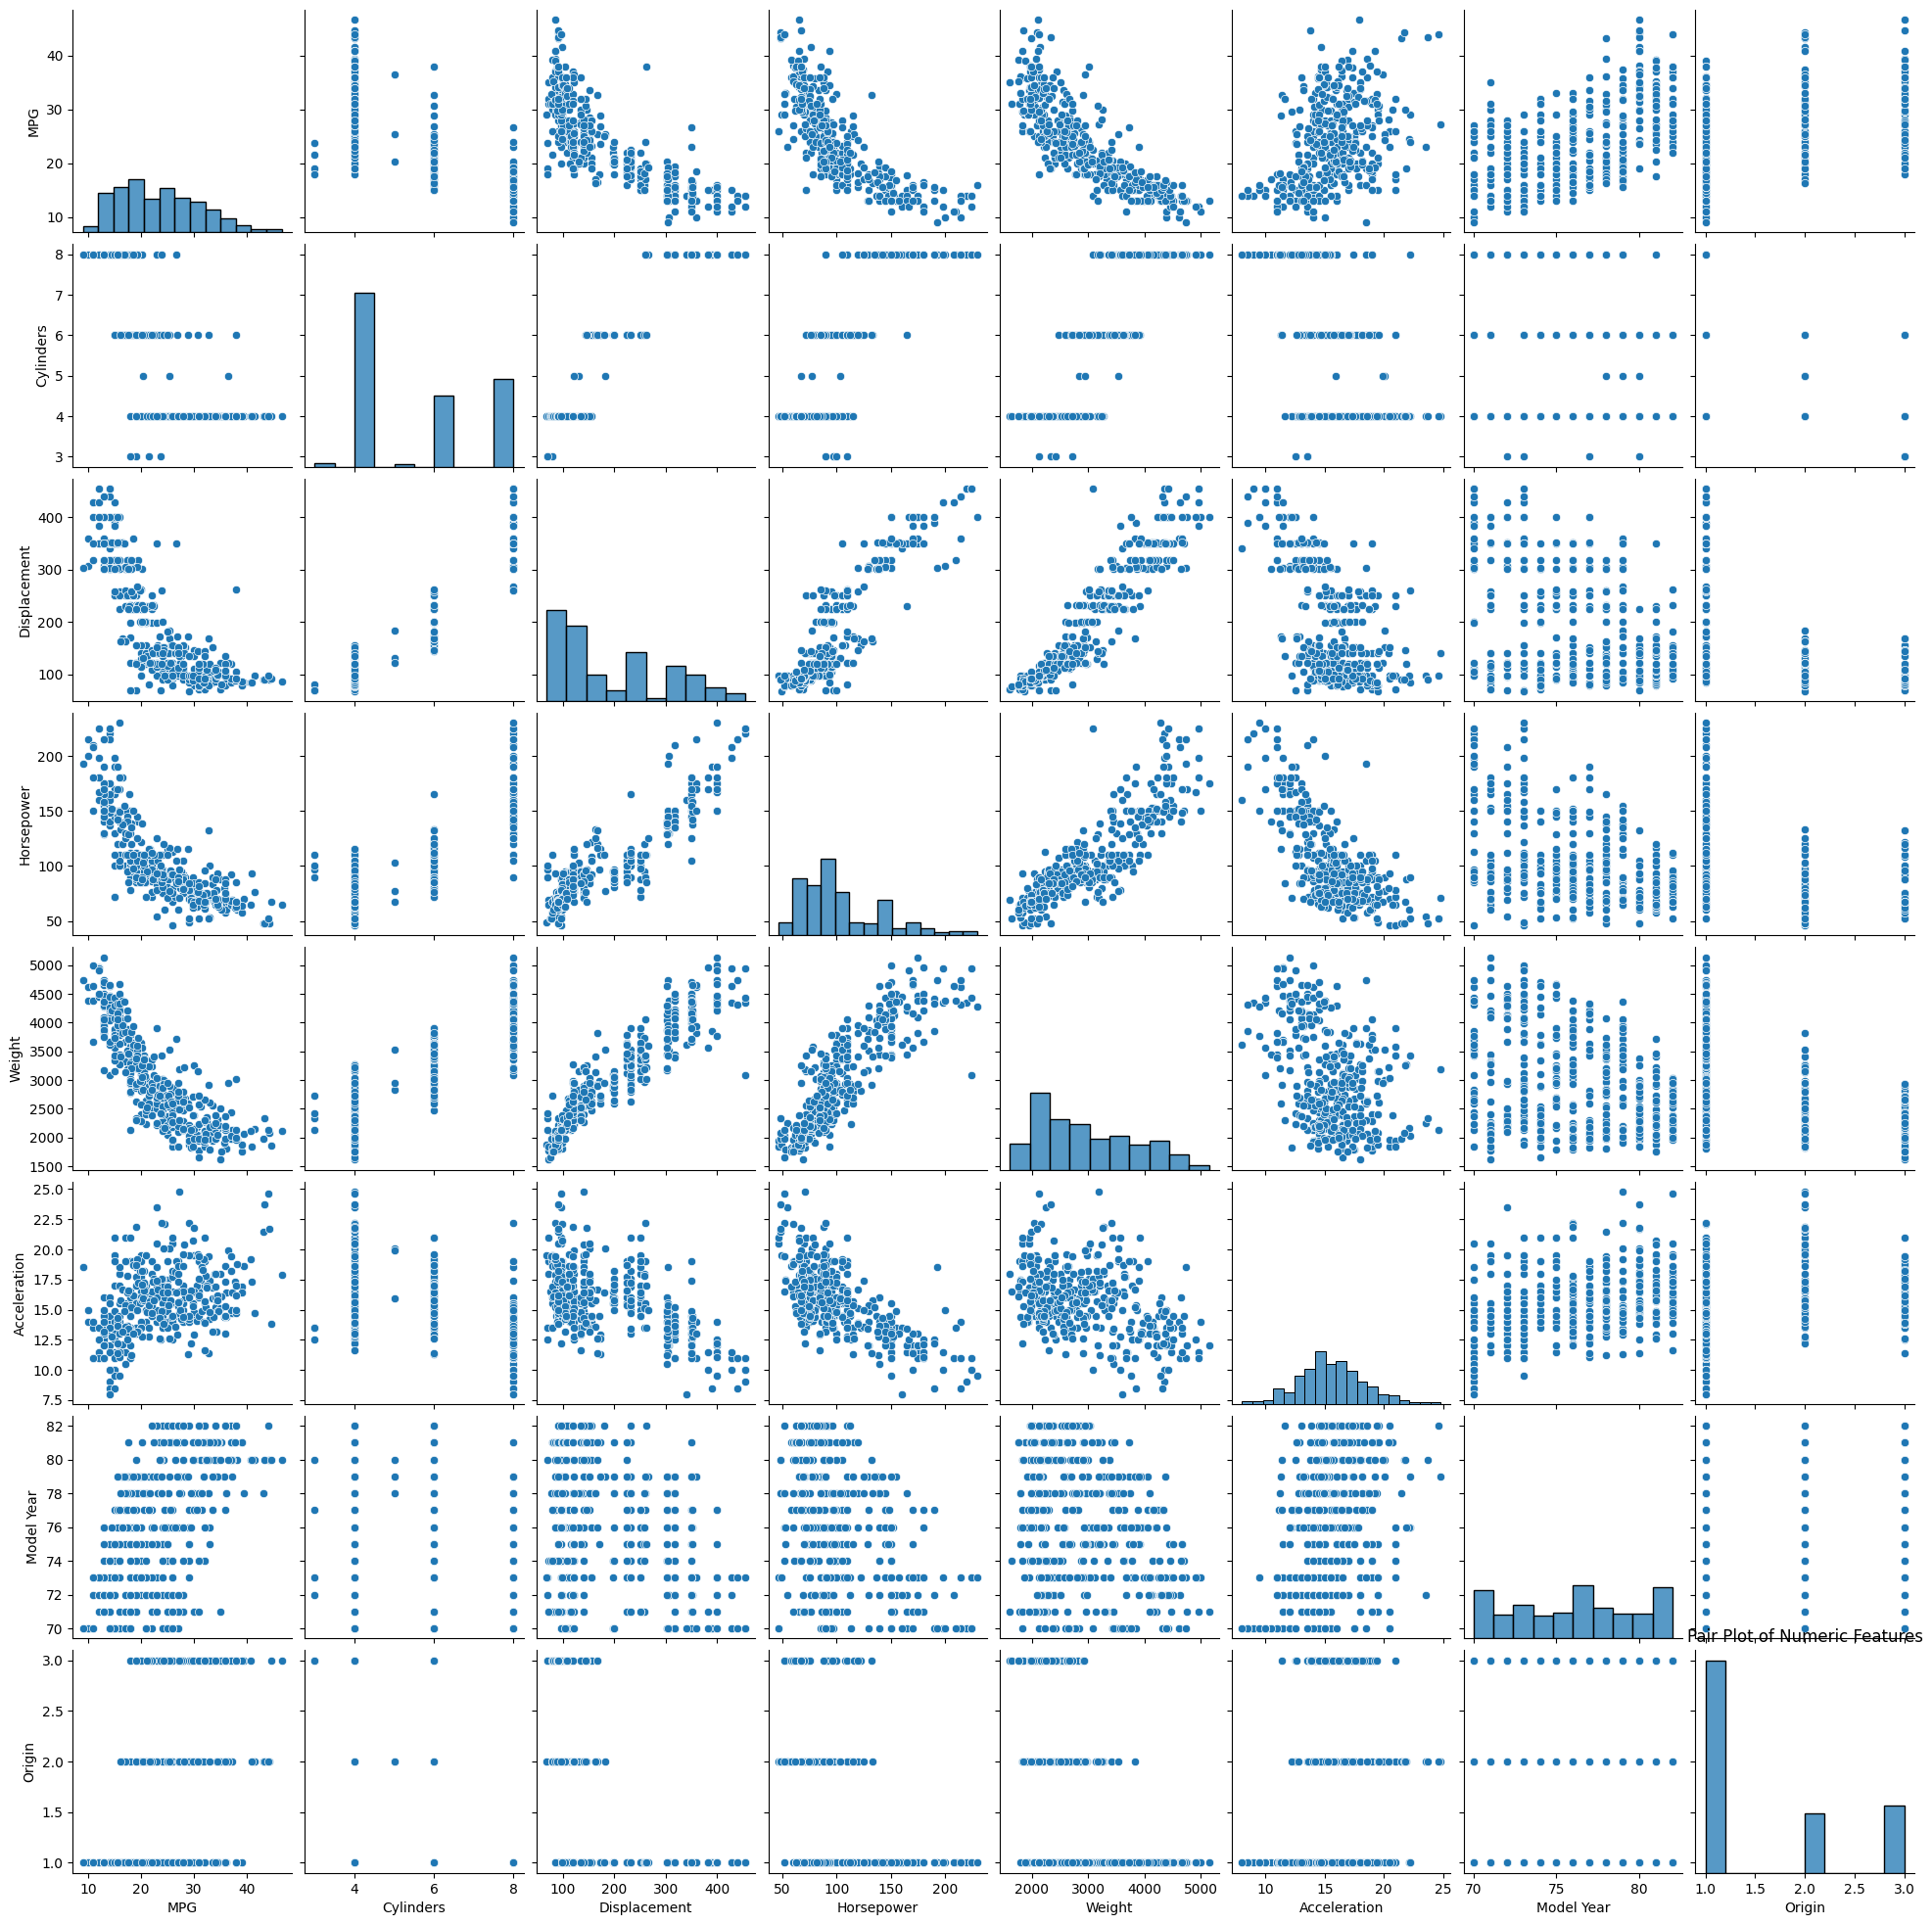

In [ ]:
numeric_columns = MPG_Data.select_dtypes(include=['float64', 'int64'])

# Creating a pair plot
plt.figure(figsize=(12, 10))
sns.pairplot(numeric_columns)
plt.title('Pair Plot of Numeric Features')
plt.show()

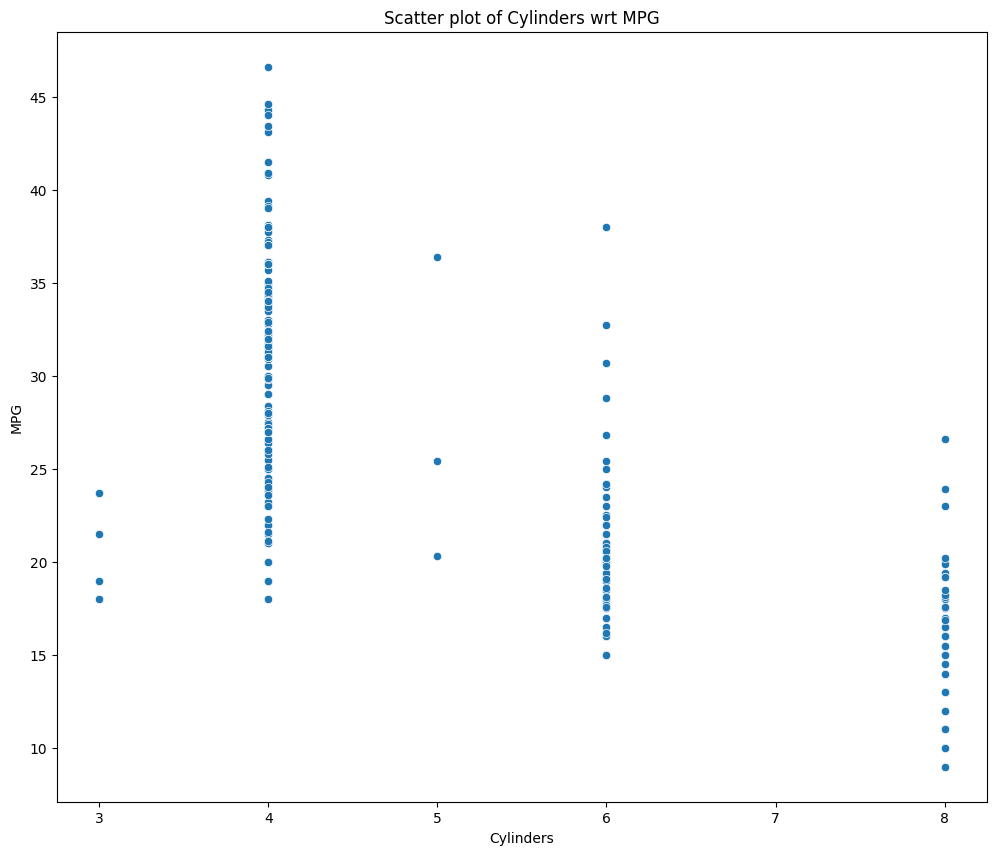

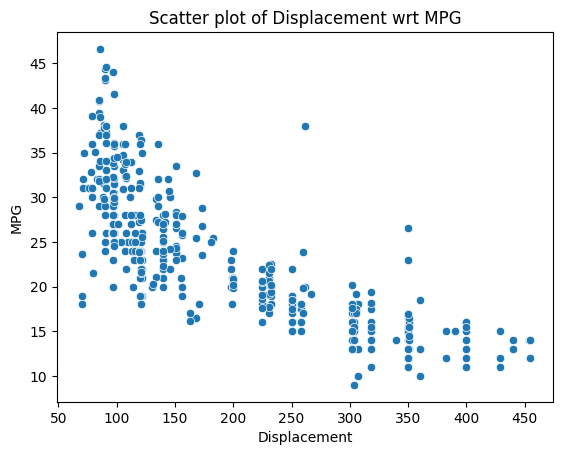

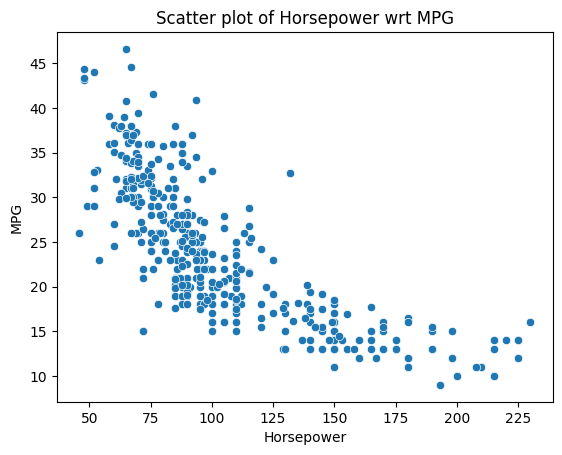

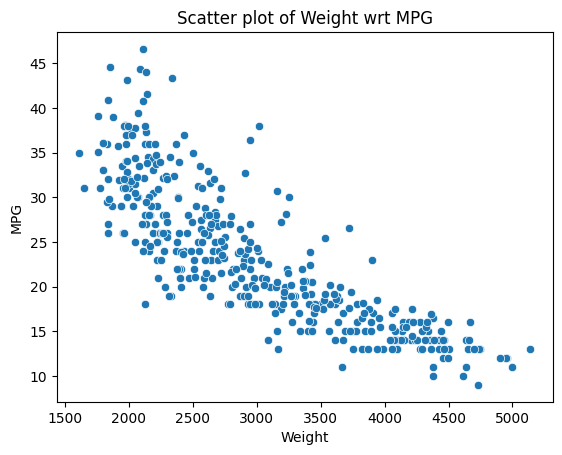

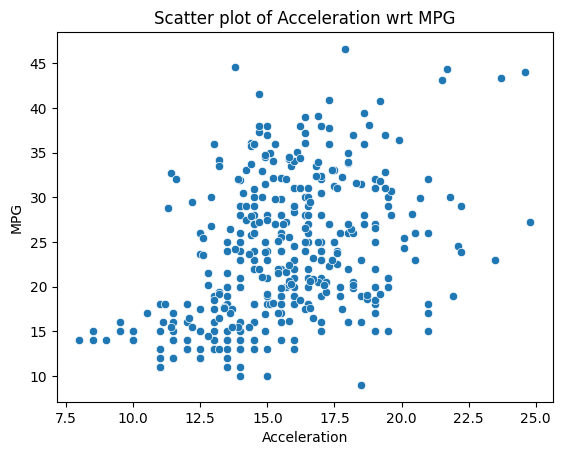

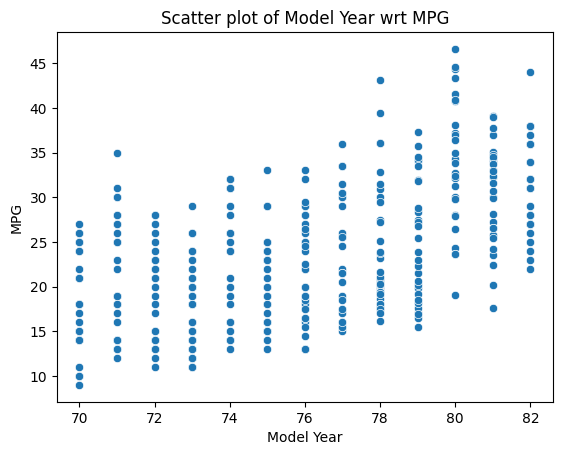

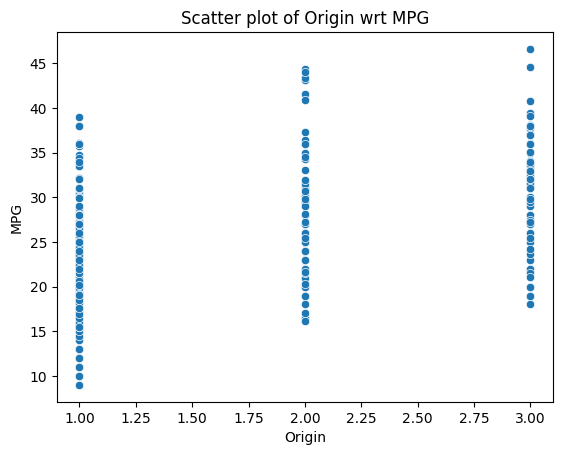

In [ ]:
numeric_columns = MPG_Data.select_dtypes(include=['float64', 'int64'])

# Creating scatter plots for each numeric feature against 'MPG'
plt.figure(figsize=(12, 10))
for col in numeric_columns.columns:
    if col != 'MPG':  # Exclude MPG from the plots
        sns.scatterplot(x=MPG_Data[col], y=MPG_Data['MPG'])
        plt.title(f'Scatter plot of {col} wrt MPG')
        plt.xlabel(col)
        plt.ylabel('MPG')
        plt.show()

In [ ]:
def plot_feature_distribution(feature):
    plt.figure(figsize=(8, 6))
    sns.histplot(data=MPG_Data[feature], kde=True, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


<ipython-input-52-d5ad07a3fc5f>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=MPG_Data[feature], kde=True, palette='viridis')


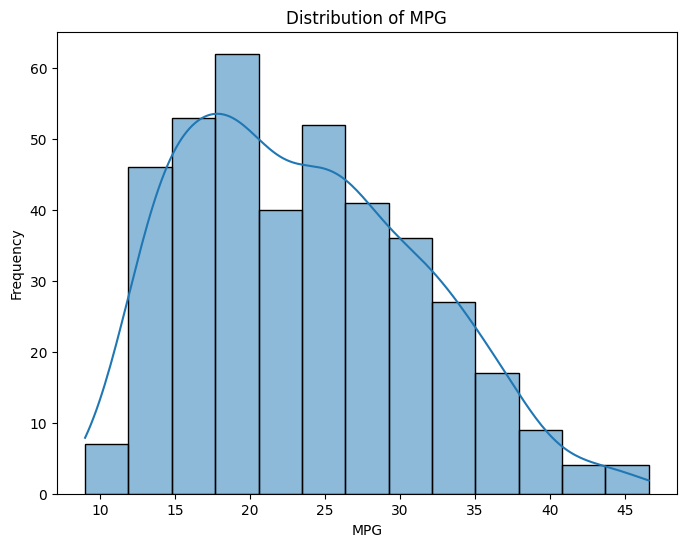

In [ ]:
#MPG target variable
plot_feature_distribution('MPG')

<ipython-input-52-d5ad07a3fc5f>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=MPG_Data[feature], kde=True, palette='viridis')


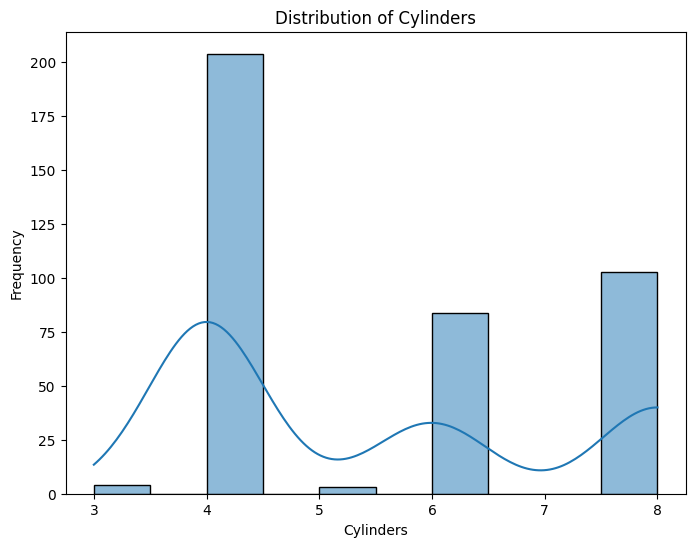

In [ ]:
#Cylinders
plot_feature_distribution('Cylinders')

<ipython-input-52-d5ad07a3fc5f>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=MPG_Data[feature], kde=True, palette='viridis')


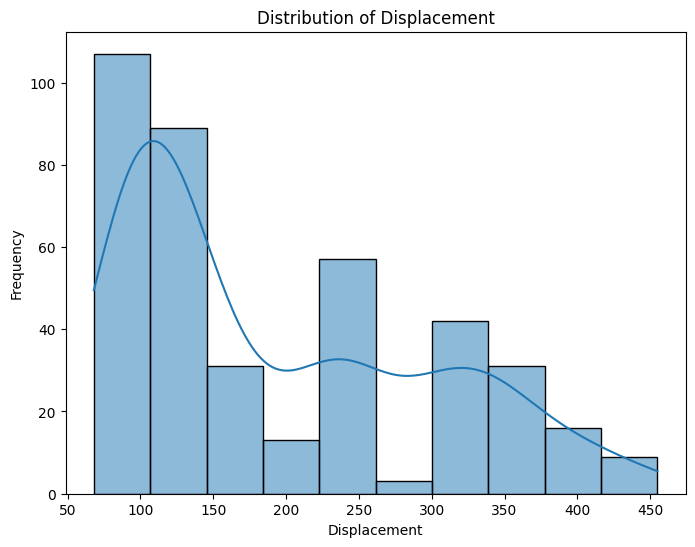

In [ ]:
#Displacement
plot_feature_distribution('Displacement')

<ipython-input-52-d5ad07a3fc5f>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=MPG_Data[feature], kde=True, palette='viridis')


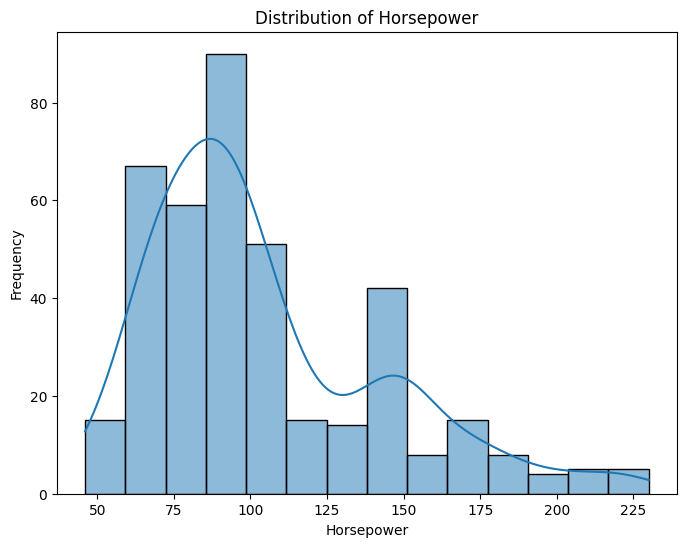

In [ ]:
#Horsepower
plot_feature_distribution('Horsepower')

<ipython-input-52-d5ad07a3fc5f>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=MPG_Data[feature], kde=True, palette='viridis')


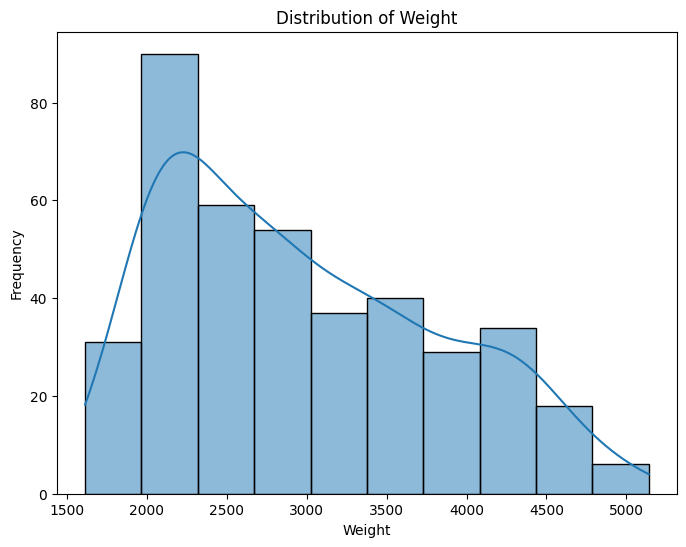

In [ ]:
#Weight
plot_feature_distribution('Weight')

<ipython-input-52-d5ad07a3fc5f>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=MPG_Data[feature], kde=True, palette='viridis')


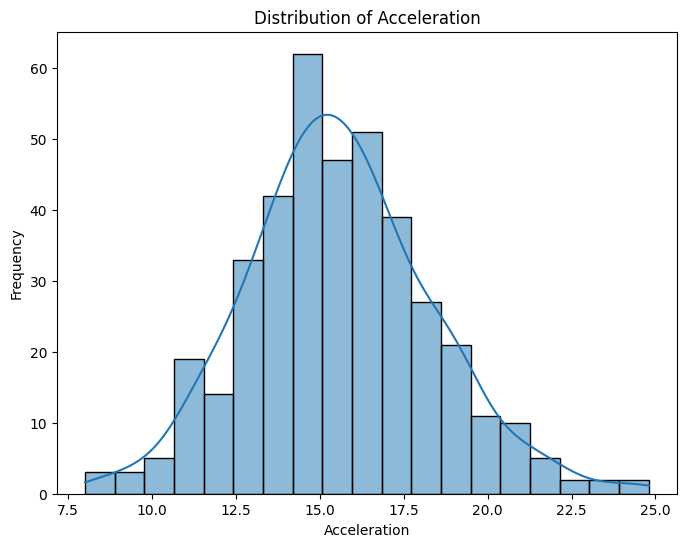

In [ ]:
#Acceleration
plot_feature_distribution('Acceleration')

# //////// MODEL BUILDING ////////////



*   **The dataset is complete**
*   There is **not extreme skewness or outliers**
*  ** Class imalance is not an issue here**
*   **Data had some error entries which have been cleaned**

**This dataset is good for creating a regression model**




**First step to create a predictive model that gives the mileage of the car provided its features**

In [5]:
#Keep Orginal data safe
Model_Data=MPG_Data.copy()
Model_Data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car_Name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [6]:
#car name is very specfic and wont contribute to mileage
Model_Data=Model_Data.drop(['Car_Name'], axis=1)
# Define the features and target variable
X = Model_Data.drop(['MPG'], axis=1)  # Exclude the target variable
Y = Model_Data['MPG']
Model_Data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the preprocessing steps
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

it was observed that** random forest regressor gave the best Metrics values** out of the implemented models during project prepration

**Gradient Boosting Regressor Metrics:**

Mean Squared Error (MSE): 5.507396726070938

R2 Score: 0.8975681420984638

Explained Variance Score: 0.8987317413958424

Mean Absolute Error (MAE): 1.7481468582792346




**Support Vector Machine (SVM) Metrics:**

Mean Squared Error (MSE): 13.735343259797418

R2 Score: 0.7445368839407867

Explained Variance Score: 0.7446235714213283

Mean Absolute Error (MAE): 2.7910368103890972




**AdaBoost Regressor Metrics:**

Mean Squared Error (MSE): 7.211310407723259

R2 Score: 0.8658771176822857

Explained Variance Score: 0.8780953454684635

Mean Absolute Error (MAE): 2.0951517064023273




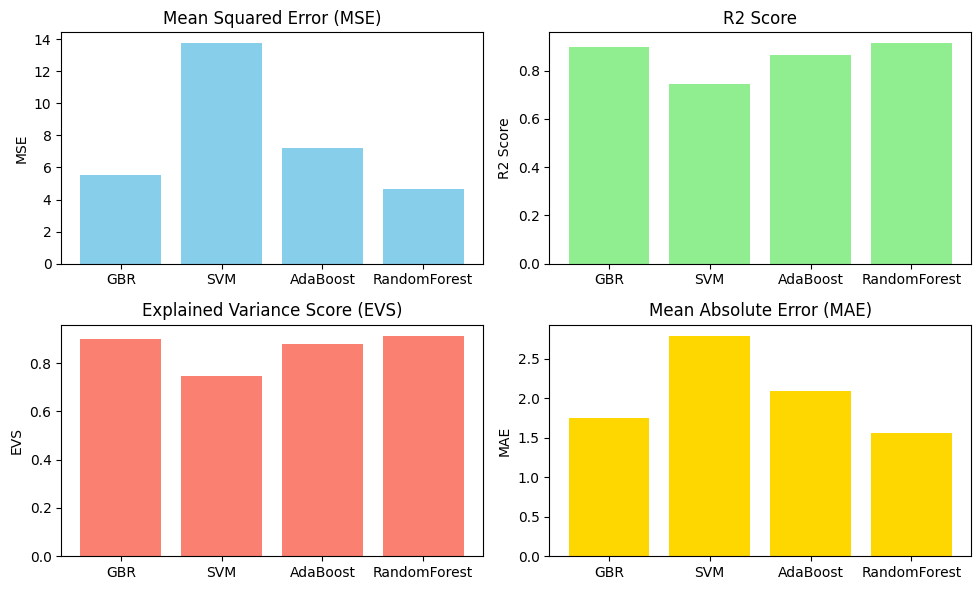

In [ ]:
import matplotlib.pyplot as plt

# Define short model names
models = ['GBR', 'SVM', 'AdaBoost', 'RandomForest']

# Define metric values for different models
mse_values = [5.507, 13.735, 7.211, 4.657]
r2_values = [0.898, 0.745, 0.866, 0.913]
evs_values = [0.899, 0.745, 0.878, 0.913]
mae_values = [1.748, 2.791, 2.095, 1.565]

# Plotting the metrics for comparison
plt.figure(figsize=(10, 6))

# Mean Squared Error (MSE)
plt.subplot(221)
plt.bar(models, mse_values, color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')

# R2 Score
plt.subplot(222)
plt.bar(models, r2_values, color='lightgreen')
plt.title('R2 Score')
plt.ylabel('R2 Score')

# Explained Variance Score (EVS)
plt.subplot(223)
plt.bar(models, evs_values, color='salmon')
plt.title('Explained Variance Score (EVS)')
plt.ylabel('EVS')

# Mean Absolute Error (MAE)
plt.subplot(224)
plt.bar(models, mae_values, color='gold')
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()


In [ ]:
# Create a Random Forest Regressor model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])
# Train the model
test_y_pred=model.fit(X_train, y_train)


# Predicting on test set
y_pred = model.predict(X_test)


# Calculate evaluation metrics for training set
train_mse = mean_squared_error(y_train, train_y_pred)
train_r2 = r2_score(y_train, train_y_pred)
train_evs = explained_variance_score(y_train, train_y_pred)
train_mae = mean_absolute_error(y_train, train_y_pred)

# Print metrics for the training set
print("Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"R2 Score: {train_r2}")
print(f"Explained Variance Score: {train_evs}")
print(f"Mean Absolute Error (MAE): {train_mae}")

# Predicting on test set has already been done in your code

# Calculate evaluation metrics for test set (from your existing code)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print metrics for the test set
print("\nTesting Set Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Error (MAE): {mae}")

Training Set Metrics:
Mean Squared Error (MSE): 1.1917811257861644
R2 Score: 0.980991181301952
Explained Variance Score: 0.9809984018202383
Mean Absolute Error (MAE): 0.7525974842767293

Testing Set Metrics:
Mean Squared Error (MSE): 4.587986887499997
R2 Score: 0.9146682099929662
Explained Variance Score: 0.9146885718130884
Mean Absolute Error (MAE): 1.5756875000000001


The model shows **marginal overfitting , so using hyper parameter tuning to improve the model**

# Hyperparameters Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



# Define preprocessing for numerical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Create a pipeline with the preprocessor and the Random Forest Regressor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])

# Define the hyperparameters grid for tuning
param_grid = {
    'regressor__n_estimators': [100, 200, 300],  # Number of trees in the forest
    'regressor__max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    # Add other hyperparameters to tune
    # 'regressor__min_samples_split': [2, 5, 10],
    # 'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X, Y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Negative MSE Score:", best_score)


Best Parameters: {'regressor__max_depth': None, 'regressor__n_estimators': 300}
Best Negative MSE Score: -9.33066093024261


# Model Retraining with adjusted Hyper Parameters

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_error



# Define preprocessing for numerical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Create a pipeline with the updated hyperparameters for the Random Forest Regressor
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(n_estimators=300, max_depth=None, random_state=42))])

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on the training set
train_y_pred = model.predict(X_train)

# Calculate evaluation metrics for the training set
train_mse = mean_squared_error(y_train, train_y_pred)
train_r2 = r2_score(y_train, train_y_pred)
train_evs = explained_variance_score(y_train, train_y_pred)
train_mae = mean_absolute_error(y_train, train_y_pred)

# Print metrics for the training set
print("Training Set Metrics:")
print(f"Mean Squared Error (MSE): {train_mse}")
print(f"R2 Score: {train_r2}")
print(f"Explained Variance Score: {train_evs}")
print(f"Mean Absolute Error (MAE): {train_mae}")

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics for the test set
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print metrics for the test set
print("\nTesting Set Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R2 Score: {r2}")
print(f"Explained Variance Score: {evs}")
print(f"Mean Absolute Error (MAE): {mae}")


Training Set Metrics:
Mean Squared Error (MSE): 1.1723393197064989
R2 Score: 0.9813012766365187
Explained Variance Score: 0.9813051158653037
Mean Absolute Error (MAE): 0.7422337526205474

Testing Set Metrics:
Mean Squared Error (MSE): 4.657444019444453
R2 Score: 0.913376379492377
Explained Variance Score: 0.9133899967850919
Mean Absolute Error (MAE): 1.5658


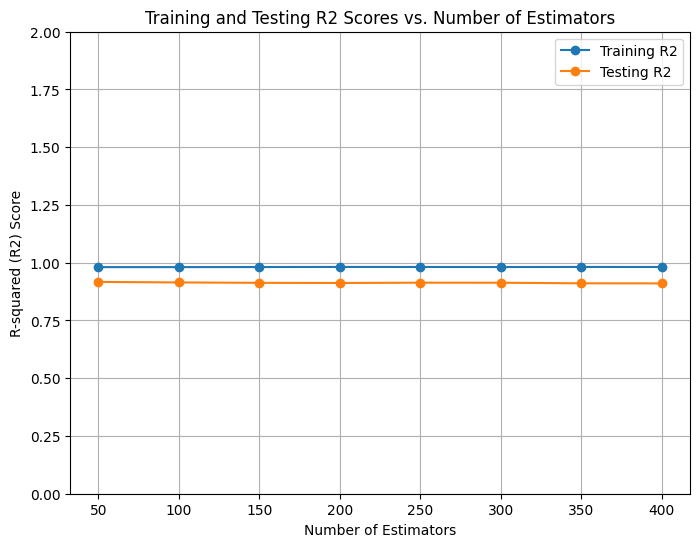

In [11]:

estimators_range = [50, 100, 150, 200, 250, 300, 350, 400]

# Lists to store training and testing R2 scores
train_r2_scores = []
test_r2_scores = []

for estimators in estimators_range:
    # Create a pipeline with the updated hyperparameters for the Random Forest Regressor
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=estimators, max_depth=None, random_state=42))
    ])

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Calculate R2 score for training set
    train_r2 = model.score(X_train, y_train)
    train_r2_scores.append(train_r2)

    # Calculate R2 score for test set
    test_r2 = model.score(X_test, y_test)
    test_r2_scores.append(test_r2)

# Plotting the training and testing R2 scores against number of estimators
plt.figure(figsize=(8, 6))

plt.plot(estimators_range, train_r2_scores, label='Training R2', marker='o')
plt.plot(estimators_range, test_r2_scores, label='Testing R2', marker='o')

plt.xlabel('Number of Estimators')
plt.ylabel('R-squared (R2) Score')
plt.title('Training and Testing R2 Scores vs. Number of Estimators')
plt.legend()
plt.grid(True)


plt.ylim(0, 2)

plt.show()


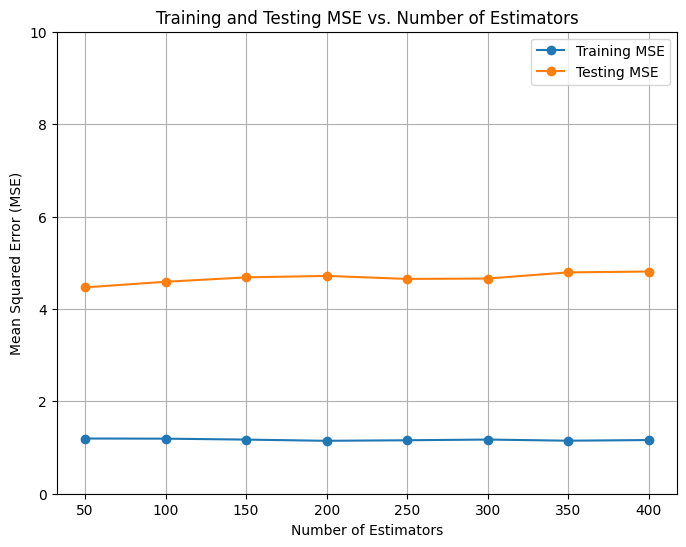

In [12]:
import matplotlib.pyplot as plt

# Define a range of values for the number of estimators (trees)
estimators_range = [50, 100, 150, 200, 250, 300, 350, 400]  # Modify as needed

# Lists to store training and testing MSE scores
train_mse_scores = []
test_mse_scores = []

for estimators in estimators_range:
    # Create a pipeline with the updated hyperparameters for the Random Forest Regressor
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=estimators, max_depth=None, random_state=42))
    ])

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Predict on the training set
    train_y_pred = model.predict(X_train)
    # Calculate MSE for training set
    train_mse = mean_squared_error(y_train, train_y_pred)
    train_mse_scores.append(train_mse)

    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculate MSE for test set
    test_mse = mean_squared_error(y_test, y_pred)
    test_mse_scores.append(test_mse)

# Plotting the training and testing MSE scores against number of estimators
plt.figure(figsize=(8, 6))

plt.plot(estimators_range, train_mse_scores, label='Training MSE', marker='o')
plt.plot(estimators_range, test_mse_scores, label='Testing MSE', marker='o')

plt.xlabel('Number of Estimators')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training and Testing MSE vs. Number of Estimators')
plt.legend()
plt.grid(True)

# Set Y-axis range from 0 to 10
plt.ylim(0, 10)

plt.show()


These **evaluation metrics indicate that the model performs quite well in predicting mileage (MPG)** ,

**R2 Score: 0.915** -  Suggesting that the **model is quite effective in capturing the variance in the MPG values provided this is a regression model**

# /////// Recommender System ///////

Since we have created a model that can predict mileage with the availale dataset **we can generate a Customized tuning system that takes into account similarity between different car models and suggest values for the spec features** which would provide a better mileage for the automobiles.


In [ ]:
import numpy as np
from collections import defaultdict
import random
from IPython.display import display, HTML

In [ ]:


def get_car_features(car_data, dfa):
    if len(car_data) > 0:
        return car_data.drop(['MPG', 'Car_Name'], axis=1).values[0]
    else:
        print(f"Car name not found in the dataset.")
        return None

def get_similar_cars(car_name, car_features, dfa, n_similar=5):
    similar_cars = dfa[dfa['Car_Name'] != car_name]
    if len(similar_cars) > 0:
        similar_cars['Distance'] = np.linalg.norm(similar_cars.drop(['MPG', 'Car_Name'], axis=1) - car_features, axis=1)
        return similar_cars.sort_values(by='Distance').head(n_similar)
    else:
        print(f"No similar cars found in the dataset.")
        return None

def generate_recommendations(similar_cars, car_data):
    recommendations = defaultdict(list)
    if not similar_cars.empty:
        for feature in similar_cars.drop(['MPG', 'Car_Name', 'Distance'], axis=1):
            values = similar_cars[feature].values
            recommendations[feature].extend([np.median(values), np.mean(values), np.max(values), values[0]])

        origin_values = car_data['Origin'].values * np.ones((5, 1))
        model_year_values = car_data['Model Year'].values * np.ones((5, 1))
        recommendations['Origin'] = [np.median(origin_values), np.mean(origin_values), np.max(origin_values), origin_values[0][0]]
        recommendations['Model Year'] = [np.median(model_year_values), np.mean(model_year_values), np.max(model_year_values), model_year_values[0][0]]

        return recommendations
    else:
        print(f"No similar cars found in the dataset.")
        return None

def generate_suggestions(recommendations):
    suggestions = []
    for i in range(5):
        random_values_list = [random.uniform(min(values), max(values)) for values in recommendations.values()]
        suggestions.append(random_values_list)
    return suggestions

def recommend_tuning(car_name, dfa, model, n_similar=5):
    car_data = dfa[dfa['Car_Name'] == car_name]
    car_features = get_car_features(car_data, dfa)

    if car_features is not None:
        similar_cars = get_similar_cars(car_name, car_features, dfa, n_similar)
        recommendations = generate_recommendations(similar_cars, car_data)

        if recommendations is not None:
            suggestions = generate_suggestions(recommendations)
            data = []
            headers = ['Suggestion'] + list(recommendations.keys()) + ['MPG']
            data.append(headers)

            original_prediction = model.predict(pd.DataFrame([car_features], columns=dfa.drop(['MPG', 'Car_Name'], axis=1).columns))[0]
            data.append(['Original'] + [f"{value:.2f}" for value in car_features] + [f"{original_prediction:.2f}"])

            for i, suggestion in enumerate(suggestions):
                car_features_df = pd.DataFrame([suggestion], columns=recommendations.keys())
                mpg_prediction = model.predict(car_features_df)[0]
                data.append([f"Suggestion {i}"] + [f"{value:.2f}" for value in suggestion] + [f"{mpg_prediction:.2f}"])

            fig, ax = plt.subplots(figsize=(10, 5))
            table = ax.table(cellText=data[1:], colLabels=headers, cellLoc='center', loc='center', colColours=['lightblue'] * len(headers))
            table.auto_set_font_size(False)
            table.set_fontsize(10)
            table.scale(1.2, 1.2)
            ax.axis('off')
            display(fig)
            plt.close(fig)

            return model.predict(pd.DataFrame([car_features], columns=dfa.drop(['MPG', 'Car_Name'], axis=1).columns))
    else:
        return None


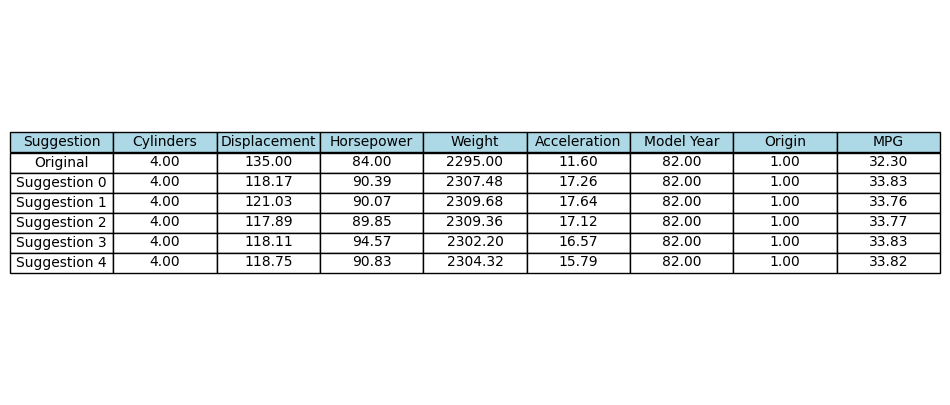


Predicted MPG: [32.30166667]


In [ ]:
# Example usage
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')
df1=MPG_Data.copy()
car_name = "dodge rampage"  # Example car name
predictions = recommend_tuning(car_name, df1, model, n_similar=5)
if predictions is not None:
    print("\nPredicted MPG:", predictions)

In [ ]:
#this feature will only work in wepages cause the dropdownused is html

from ipywidgets import interact, widgets
df1=MPG_Data.copy()
# Function to create a dropdown list and recommend tuning based on the selected car
def select_car_and_recommend_tuning(car_name):
    predictions = recommend_tuning(car_name, df1, model, n_similar=5)
    if predictions is not None:
        print("\nPredicted MPG:", predictions)

# Get unique car names for the dropdown list
car_names_list = df1['Car_Name'].unique().tolist()

# Create a dropdown widget
car_dropdown = widgets.Dropdown(options=car_names_list, description='Select a car:')

# Use interact to link the dropdown with the function
interact(select_car_and_recommend_tuning, car_name=car_dropdown);

interactive(children=(Dropdown(description='Select a car:', options=('chevrolet chevelle malibu', 'buick skyla…

# //////////////// **CONCLUSION** ///////////////


**Objective and Approach**:
The project aimed to develop a recommendation system for car tuning decisions based on vehicle attributes. It utilized a dataset containing diverse car features to suggest tuning options and predict the potential impact on miles per gallon (MPG).

**Implementation Highlights**:

Constructed functions to extract car features, identify similar cars, and generate tuning suggestions.
Integrated a machine learning model to predict MPG and presented tuning suggestions based on the selected car.

**Mileage Prediction Model**:

The MPG prediction relied on random forest regressor model trained on historical car data. This model learned from various features like engine specifications, weight, and origin to forecast the vehicle's fuel efficiency after tuning.

**Challenges and Improvements**:

Addressing data quality issues, handling outliers, and refining the model's accuracy were crucial for better recommendations.
Future enhancements could involve employing more sophisticated similarity metrics and exploring advanced machine learning techniques for MPG prediction and recommender system.

**Future Directions**:

Exploring diverse recommendation algorithms or enhancing the existing model could improve accuracy and broaden the recommendation system's capabilities.
Improving user interaction through a refined interface or a standalone application could enhance accessibility and usability.